In [147]:
!pip install pmdarima
!pip3 uninstall statsmodels
!pip3 install numpy scipy patsy pandas
!pip3 install statsmodels

Uninstalling statsmodels-0.11.1:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/statsmodels-0.11.1.dist-info/*
    /usr/local/lib/python3.6/dist-packages/statsmodels/*
Proceed (y/n)? Y
  Successfully uninstalled statsmodels-0.11.1
  Using cached https://files.pythonhosted.org/packages/cb/83/540fd83238a18abe6c2d280fa8e489ac5fcefa1f370f0ca1acd16ae1b860/statsmodels-0.11.1-cp36-cp36m-manylinux1_x86_64.whl


In [13]:
import pandas as pd 
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.tsa.seasonal import seasonal_decompose
# from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from pmdarima import auto_arima # for determining ARIMA orders
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
#read
df1=pd.read_csv('q2.csv',index_col='DATE',parse_dates=True, dtype='unicode')
# df1= df1.drop(df1.columns.difference(['DATE', 'Nominal_Value']), axis=1)
df1 = df1.filter(['DATE', 'Nominal_Value'], axis=1)
df1.head(1)

,Nominal_Value
DATE,
2016-10-17,227298.1995


In [30]:
# make numbers float
df1['Nominal_Value']= pd.to_numeric(df1['Nominal_Value'], errors='coerce')
df1.dtypes

Nominal_Value    float64
dtype: object

In [31]:
# make them monthly, quarterly is 'QS' yearly 'Y'
# make sure dates are saved in that format
df1=df1.resample('M').sum()

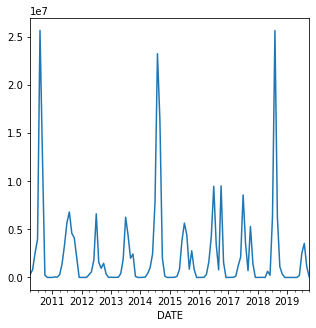

In [32]:
df1['Nominal_Value'].plot(figsize=(5,5))

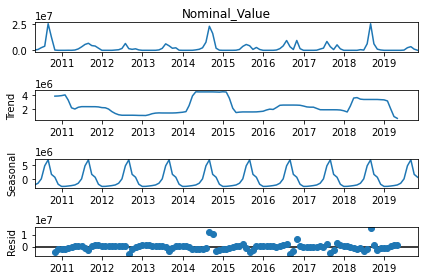

In [33]:
seasonal_decompose(df1['Nominal_Value'], freq=12).plot();

## Gear & Area

In [34]:
df2=pd.read_csv('q2.csv',index_col='YEAR',parse_dates=True, dtype='unicode')
df2 = df2.filter(['YEAR', 'GEAR_NME','LICENCE_AREA','Vessel ID Number','Nominal_Value'], axis=1)
df2.head(2)

,GEAR_NME,LICENCE_AREA,Vessel ID Number,Nominal_Value
YEAR,,,,
2016-01-01,SEINE,SALMON AREA B,4856,227298.1995
2011-01-01,SEINE,SALMON AREA B,3980,215287.9969


In [37]:
df2=pd.read_csv('q2.csv', dtype='unicode')
df2 = df2.filter(['YEAR', 'GEAR_NME','LICENCE_AREA','Vessel ID Number','Nominal_Value'], axis=1)
df2.head(2)

,YEAR,GEAR_NME,LICENCE_AREA,Vessel ID Number,Nominal_Value
0,2016,SEINE,SALMON AREA B,4856,227298.1995
1,2011,SEINE,SALMON AREA B,3980,215287.9969


In [38]:
df2['Nominal_Value']= pd.to_numeric(df2['Nominal_Value'], errors='coerce')
# df2['YEAR']=df2['YEAR'].astype(str).astype(int)
df2.dtypes

YEAR                 object
GEAR_NME             object
LICENCE_AREA         object
Vessel ID Number     object
Nominal_Value       float64
dtype: object

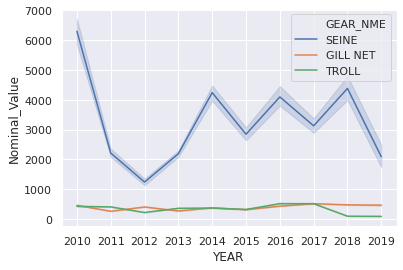

In [39]:
sns.set(style="darkgrid")
ax = sns.lineplot(x="YEAR", y="Nominal_Value", hue="GEAR_NME", data=df2)

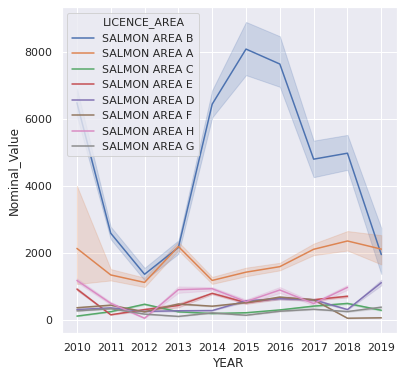

In [40]:
plt.figure(figsize=(6, 6))
ax = sns.lineplot(x="YEAR", y="Nominal_Value", hue="LICENCE_AREA", data=df2)


## ECONOMIC IMPACTS

In [41]:
df2b=df2.groupby('YEAR')['Nominal_Value'].agg('sum').reset_index()
df2b

,YEAR,Nominal_Value
0,2010,4.626987e+07
1,2011,2.835918e+07
2,2012,1.368450e+07
3,2013,1.755624e+07
4,2014,5.356156e+07
5,2015,1.934670e+07
6,2016,3.107882e+07
7,2017,2.304946e+07
8,2018,4.065010e+07
9,2019,7.465513e+06


##PARTICIPATION


In [42]:
df2.groupby('YEAR')['Vessel ID Number'].agg('nunique').reset_index()


,YEAR,Vessel ID Number
0,2010,841
1,2011,832
2,2012,730
3,2013,681
4,2014,805
5,2015,716
6,2016,711
7,2017,676
8,2018,731
9,2019,512


In [43]:
df2a=df2.groupby(['LICENCE_AREA','YEAR'])['Vessel ID Number'].agg('nunique').reset_index()
df2a.dtypes

LICENCE_AREA        object
YEAR                object
Vessel ID Number     int64
dtype: object

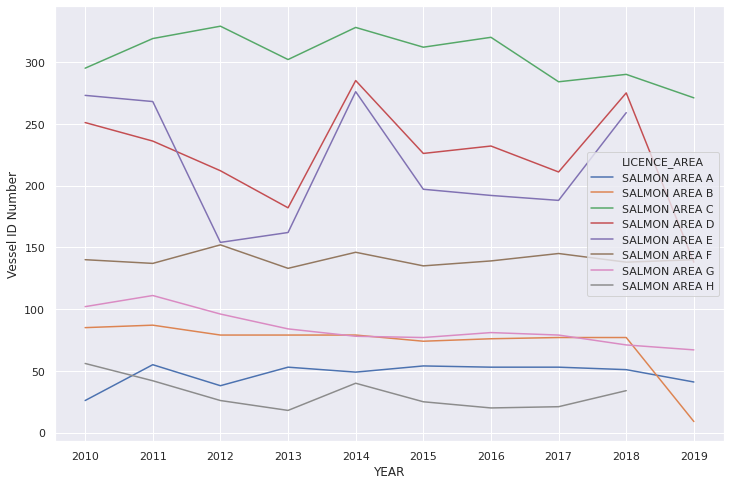

In [44]:
plt.figure(figsize=(12, 8))
ax = sns.lineplot(x="YEAR", y="Vessel ID Number", hue="LICENCE_AREA", data=df2a)

#### Greatest declines  in (vessel particpation) were in areas D,B and C